# 02 Creating a histogram

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

In [5]:
import findspark

findspark.init()
from pyspark.context import SparkContext
from pyspark.sql import functions as F
from pyspark.sql.session import SparkSession

spark = SparkSession.builder.appName("statistics").master("local").getOrCreate()

![Creating a histogram fig 1](./imgs/02-02-01.png)

In [6]:
ages = np.array(
    [1, 3, 27, 32, 5, 63, 26, 25, 18, 16, 4, 45, 29, 19, 22, 51, 58, 9, 42, 6]
)

## Generating dataset using for loop

In [7]:
buckets = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69"]
ages_list = []
for i in buckets:
    min_, max_ = i.split("-")
    get_ages = ages[(ages >= int(min_)) & (ages <= int(max_))]
    ages_list.append(len(get_ages))
dataset = {"Buckets": buckets, "#": ages_list}

### Pandas

In [8]:
df = pd.DataFrame(dataset)
df

Buckets  #
0     0-9  6
1   10-19  3
2   20-29  5
3   30-39  1
4   40-49  2
5   50-59  2
6   60-69  1

### Spark

In [9]:
sdf = spark.createDataFrame(zip(*dataset.values()), schema=list(dataset.keys()))
sdf.show()

+-------+---+
|Buckets|  #|
+-------+---+
|    0-9|  6|
|  10-19|  3|
|  20-29|  5|
|  30-39|  1|
|  40-49|  2|
|  50-59|  2|
|  60-69|  1|
+-------+---+



## Generating dataset using np histogram

In [12]:
bins = np.arange(0, 80, 10)
ages_list, buckets = np.histogram(ages, bins)
dataset = {"Buckets": buckets[1:].tolist(), "#": ages_list.tolist()}

### Pandas

In [14]:
df = pd.DataFrame(dataset)
df

Buckets  #
0       10  6
1       20  3
2       30  5
3       40  1
4       50  2
5       60  2
6       70  1

### Spark

In [15]:
sdf = spark.createDataFrame(zip(*dataset.values()), list(dataset.keys()))
sdf.show()

+-------+---+
|Buckets|  #|
+-------+---+
|     10|  6|
|     20|  3|
|     30|  5|
|     40|  1|
|     50|  2|
|     60|  2|
|     70|  1|
+-------+---+



## Histogram

### Matplotlib 

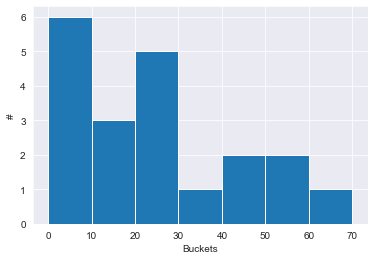

In [40]:
n, bins, _ = plt.hist(ages, buckets)
plt.xlabel("Buckets")
plt.ylabel("#")
plt.show()

In [20]:
print(n, bins)

[6. 3. 5. 1. 2. 2. 1.] [ 0 10 20 30 40 50 60 70]


### Seanorn

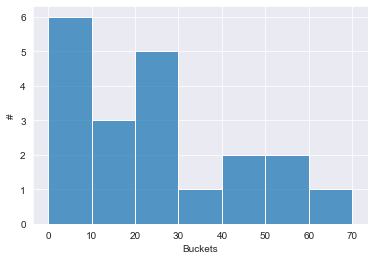

In [41]:
sns.histplot(ages, bins=buckets)
plt.xlabel("Buckets")
plt.ylabel("#")
plt.show()

### Plotly

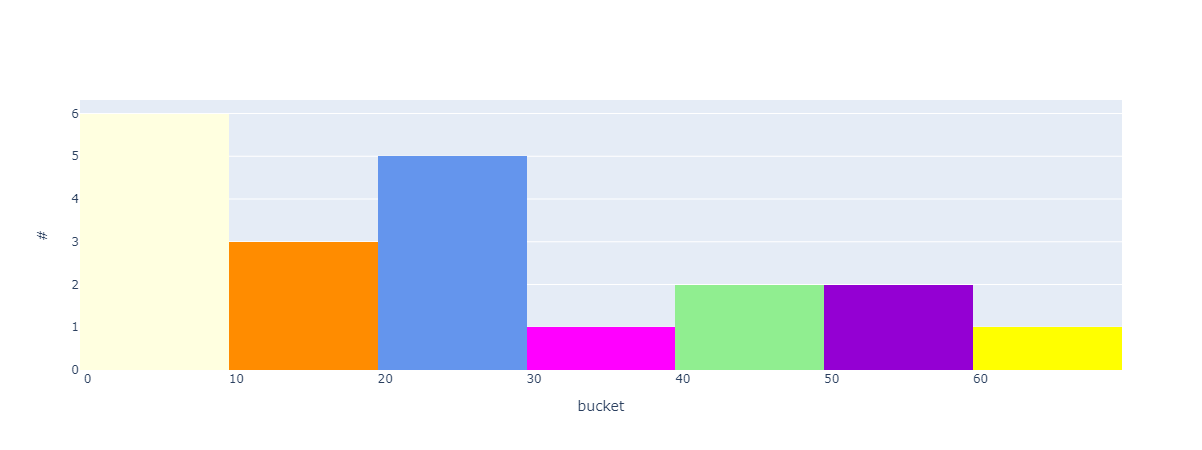

In [33]:
data = [
    go.Histogram(
        x=ages,
        nbinsx=7,
        marker=dict(
            color=[
                "lightyellow",
                "darkorange",
                "cornflowerblue",
                "magenta",
                "lightgreen",
                "darkviolet",
                "yellow",
            ]
        ),
    )
]
layout = go.Layout(xaxis=dict(title="bucket"), yaxis=dict(title="#"))
fig = go.Figure(data, layout)
fig.show()